In [1]:
from python_speech_features import ssc

In [2]:
import os
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import pickle
from tqdm import tqdm


file_folder = 'DC_train'

def read(file):
    (rate,sig) = wav.read(file)
    mfcc_feat = ssc(sig,rate)
    return(mfcc_feat)

labels = ['a','d','su','sa','n','h']

def get_category(f):
    if f[0] == 's' and f[0:2] != 'su' and f[0:2] != 'sa':
        return(0)
        
    elif f[0]== 'a':
        return(1)
        
    elif f[0] == 'd':
        return(2)
        
    elif f[0] == 'n':
        return(3)
        
    elif f[0] == 'h':
        return(4)
    
    elif f[0] == 'f':
        return(7)
        
    elif f[0:2] == 'su':
        return(5)
        
    elif f[0:2] == 'sa':
        return(6)

files = os.listdir(file_folder)

data = []

for i in tqdm(files):
    
    path = file_folder+'/'+i
    #print(i,path)
    d = read(path)
    l = get_category(i)
    for j in d:
        data.append([j,l])
    #break

def save_obj(obj, name ):
    with open( name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

save_obj(data,file_folder)


 61%|██████████████████████████████████████████████████▏                               | 52/85 [00:02<00:01, 27.51it/s]WARNING:root:frame length (1103) is greater than FFT size (512), frame will be truncated. Increase NFFT to avoid.


100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [00:03<00:00, 25.33it/s]


In [3]:
import os
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import pickle
from tqdm import tqdm


file_folder = 'DC_test'

def read(file):
    (rate,sig) = wav.read(file)
    mfcc_feat = ssc(sig,rate)
    return(mfcc_feat)

labels = ['a','d','su','sa','n','h']

def get_category(f):
    if f[0] == 's' and f[0:2] != 'su' and f[0:2] != 'sa':
        return(0)
        
    elif f[0]== 'a':
        return(1)
        
    elif f[0] == 'd':
        return(2)
        
    elif f[0] == 'n':
        return(3)
        
    elif f[0] == 'h':
        return(4)
    
    elif f[0] == 'f':
        return(7)
        
    elif f[0:2] == 'su':
        return(5)
        
    elif f[0:2] == 'sa':
        return(6)

files = os.listdir(file_folder)

data = []

for i in tqdm(files):
    
    path = file_folder+'/'+i
    #print(i,path)
    d = read(path)
    l = get_category(i)
    for j in d:
        data.append([j,l])
    #break

def save_obj(obj, name ):
    with open( name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

save_obj(data,file_folder)


100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [00:02<00:00, 16.32it/s]


In [4]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
#from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
#import seaborn as sns


#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
#sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

import pickle
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

data = load_obj('DC_train')
from random import shuffle
shuffle(data)

X = []
y = []

for mfcc,label in data:
    X.append(mfcc)
    y.append(label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
model = ensemble.RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
score=accuracy_score(y_test, y_pred)
print("training_score",score)

training_score 0.44361154620720517


In [8]:
data = load_obj('DC_test')
X = []
y = []

for ssc,label in data:
    X.append(ssc)
    y.append(label)
y_pred=model.predict(X)
score=accuracy_score(y, y_pred)
print(score)

0.23349978942301908


Confusion matrix, without normalization
[[ 366   82 1189  168   52  199   36]
 [ 137  197 1615   88   93  228  103]
 [  54   54 1913   32   21   85   36]
 [ 204  133 1200  443  192  216  173]
 [ 179  101 1189  206  239  183  254]
 [ 173  167 1716  103   41  575   66]
 [ 179  102  940  211   71  469  148]]
Normalized confusion matrix
[[0.1749522  0.03919694 0.56835564 0.08030593 0.0248566  0.09512428
  0.01720841]
 [0.05566843 0.08004876 0.6562373  0.03575782 0.03778952 0.09264527
  0.04185291]
 [0.02460137 0.02460137 0.8715262  0.01457859 0.0095672  0.03872437
  0.01640091]
 [0.07965638 0.05193284 0.46856697 0.1729793  0.07497071 0.08434205
  0.06755174]
 [0.07613781 0.04296044 0.50574224 0.08762229 0.10165887 0.07783922
  0.10803913]
 [0.06089405 0.05878212 0.60401267 0.03625484 0.01443154 0.20239352
  0.02323126]
 [0.08443396 0.04811321 0.44339623 0.0995283  0.03349057 0.22122642
  0.06981132]]


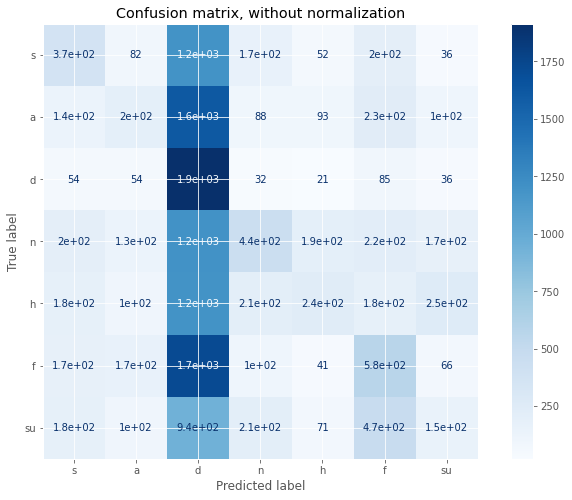

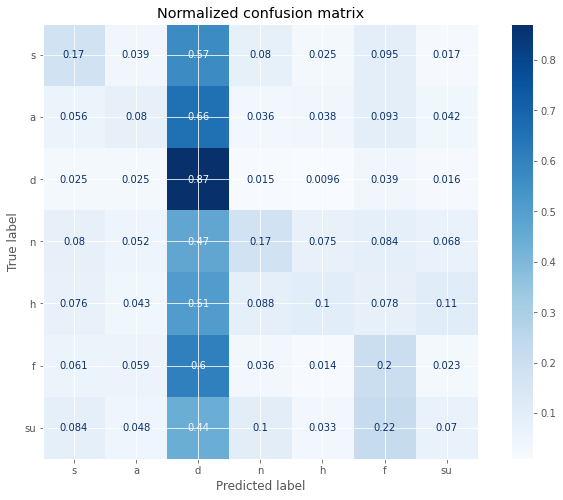

In [9]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

from sklearn.metrics import plot_confusion_matrix
class_names = ['s','a','d','n','h','f','su','sa']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X, y,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()